In [67]:
import pandas as pd
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df =pd.read_csv("train.csv")

In [69]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [70]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


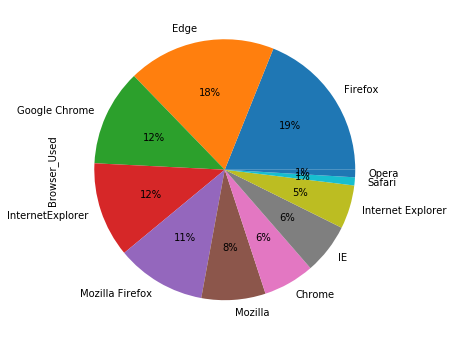

In [71]:
df.Browser_Used.value_counts().plot(kind='pie', autopct='%1.0f%%')

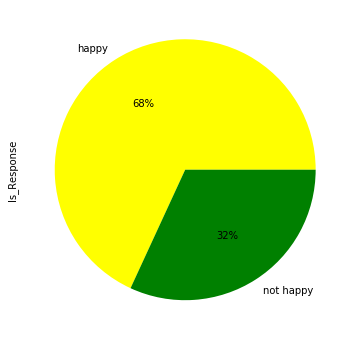

In [72]:
df.Is_Response.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "yellow", "green"])

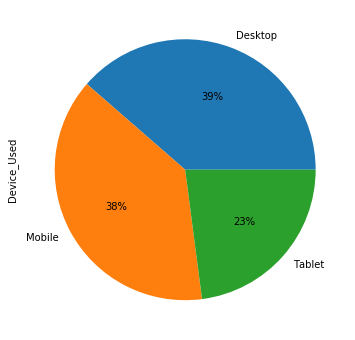

In [73]:
df.Device_Used.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [74]:
labels = df.iloc[:, -1].values

In [75]:
labels

array(['not happy', 'not happy', 'not happy', ..., 'not happy',
       'not happy', 'happy'], dtype=object)

In [76]:
features = df.iloc[:, 1].values

features

array(["The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.",
       "I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the o

In [77]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [78]:
processed_features

['the room was kind of clean but had very strong smell of dogs generally below average but ok for overnight stay if you re not too fussy would consider staying again if the price was right breakfast was free and just about better than nothing ',
 'i stayed at the crown plaza april april the staff was friendly and attentive the elevators are tiny about by the food in the restaurant was delicious but priced little on the high side of course this is washington dc there is no pool and little for children to do my room on the fifth floor had two comfortable beds and plenty of space for one person the tv is little small by todays standards with limited number of channels there was small bit of mold in the bathtub area that could have been removed with little bleach it appeared the carpets were not vacummed every day reported light bulb was burned out it was never replaced ice machines are on the odd numbered floors but the one on my floor did not work encountered some staff in the elevator o

In [79]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [80]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [83]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier()
text_classifier.fit(X_train, y_train)
                    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
predictions = text_classifier.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print('accuracy score',accuracy_score(y_test, predictions))

[[5022  263]
 [1200 1302]]
accuracy score 0.8121227687170925
